In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mlflow
import mlflow.sklearn

mlflow.set_experiment("RegressionSal")

In [2]:
# Importing the dataset
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [3]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [4]:
# parmeters for model
alpha = 0.7
l1_ratio = 0.7
random_state=40

In [5]:
with mlflow.start_run():
    # Fitting Simple Linear Regression to the Training set
    #from sklearn.linear_model import LinearRegression
    
    #regressor = LinearRegression()
    #regressor.fit(X_train, y_train)
    
    from sklearn.linear_model import ElasticNet
    lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=random_state)
    lr.fit(X_train, y_train)
    
    # Predicting the Test set results
    #y_pred = regressor.predict(X_test)
    y_pred = lr.predict(X_test)
    #np.savetxt("result.csv", y_pred, delimiter=",")

    from sklearn import metrics

    mlflow.log_metric("MAE", metrics.mean_absolute_error(y_test, y_pred))
    mlflow.log_metric("MSE", metrics.mean_squared_error(y_test, y_pred))
    mlflow.log_metric("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    mlflow.log_metric("r2", metrics.r2_score(y_test, y_pred))
    mlflow.log_param("alpha", alpha)
    mlflow.log_param("l1_ratio", l1_ratio)

    df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    df1.to_csv('result.txt', encoding='utf-8', index=False)
    
    mlflow.log_artifact("Salary_Data.csv")
    mlflow.log_artifact("result.txt")
    
    accuracy = lr.score(X_test,y_test)
    print(accuracy*100,'%')
    mlflow.log_param("accuracy", accuracy)
    
    mlflow.sklearn.log_model(lr, "model")

97.25631881986955 %


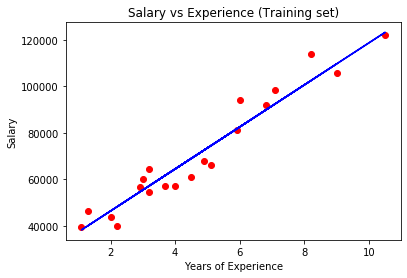

In [6]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lr.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

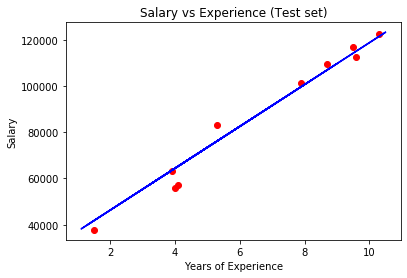

In [7]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, lr.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

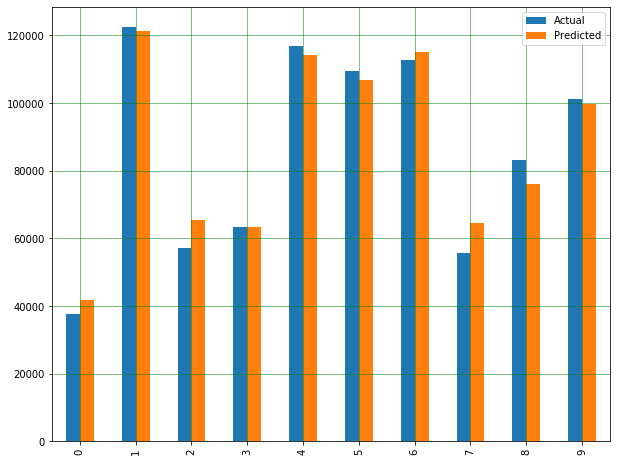

In [8]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [9]:
mlflow.search_runs()

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.r2,metrics.RMSE,metrics.MAE,metrics.MSE,params.alpha,params.accuracy,params.l1_ratio,tags.mlflow.source.name,tags.mlflow.source.type,tags.mlflow.user,tags.mlflow.log-model.history
0,d5d3862873a8432bb3a3d943b52c568d,3,FINISHED,file:///Users/dhananjay/Desktop/Machine%20Lear...,2020-05-03 17:05:08.550000+00:00,2020-05-03 17:05:08.636000+00:00,0.972563,4795.592812,3840.815594,2.299771e+07,0.7,0.9725631881986955,0.7,/usr/local/anaconda3/envs/myenv/lib/python3.6/...,LOCAL,dhananjay,"[{""run_id"": ""d5d3862873a8432bb3a3d943b52c568d""..."
1,5b9f71dd290b4dcc9e495eff1e666fc7,3,FINISHED,file:///Users/dhananjay/Desktop/Machine%20Lear...,2020-05-03 17:03:26.737000+00:00,2020-05-03 17:03:26.852000+00:00,0.972563,4795.592812,3840.815594,2.299771e+07,0.7,0.9725631881986955,0.7,/usr/local/anaconda3/envs/myenv/lib/python3.6/...,LOCAL,dhananjay,"[{""run_id"": ""5b9f71dd290b4dcc9e495eff1e666fc7""..."
2,b3228b3a4a6d45e89e6ce98a3453a111,3,FINISHED,file:///Users/dhananjay/Desktop/Machine%20Lear...,2020-05-03 16:13:44.825000+00:00,2020-05-03 16:13:44.916000+00:00,0.972563,4795.592812,3840.815594,2.299771e+07,0.7,0.9725631881986955,0.7,/usr/local/anaconda3/envs/myenv/lib/python3.6/...,LOCAL,dhananjay,"[{""run_id"": ""b3228b3a4a6d45e89e6ce98a3453a111""..."
3,5672ef7773d94be0b6674908b7b9e53d,3,FINISHED,file:///Users/dhananjay/Desktop/Machine%20Lear...,2020-05-03 16:13:22.783000+00:00,2020-05-03 16:13:22.851000+00:00,0.972563,4795.592812,3840.815594,2.299771e+07,0.7,0.9725631881986955,0.7,/usr/local/anaconda3/envs/myenv/lib/python3.6/...,LOCAL,dhananjay,"[{""run_id"": ""5672ef7773d94be0b6674908b7b9e53d""..."
4,704291f0775f4d4b97f84012251f5c31,3,FAILED,file:///Users/dhananjay/Desktop/Machine%20Lear...,2020-05-03 16:11:38.780000+00:00,2020-05-03 16:11:38.848000+00:00,0.972563,4795.592812,3840.815594,2.299771e+07,0.7,0.9725631881986955,0.7,/usr/local/anaconda3/envs/myenv/lib/python3.6/...,LOCAL,dhananjay,"[{""run_id"": ""704291f0775f4d4b97f84012251f5c31""..."
5,486490f4acf148deaf81d9bb2b573258,3,FAILED,file:///Users/dhananjay/Desktop/Machine%20Lear...,2020-05-03 16:08:01.479000+00:00,2020-05-03 16:08:01.549000+00:00,0.972563,4795.592812,3840.815594,2.299771e+07,0.7,0.9725631881986955,0.7,/usr/local/anaconda3/envs/myenv/lib/python3.6/...,LOCAL,dhananjay,"[{""run_id"": ""486490f4acf148deaf81d9bb2b573258""..."
6,0b9363ddb73a4741ade8d1d123de7d5f,3,FAILED,file:///Users/dhananjay/Desktop/Machine%20Lear...,2020-05-03 16:07:13.063000+00:00,2020-05-03 16:07:13.148000+00:00,0.972563,4795.592812,3840.815594,2.299771e+07,0.7,0.9725631881986955,0.7,/usr/local/anaconda3/envs/myenv/lib/python3.6/...,LOCAL,dhananjay,"[{""run_id"": ""0b9363ddb73a4741ade8d1d123de7d5f""..."
7,255bff3de1bf44ad8de58cff15258c67,3,FAILED,file:///Users/dhananjay/Desktop/Machine%20Lear...,2020-05-03 16:06:40.206000+00:00,2020-05-03 16:06:40.259000+00:00,0.972563,4795.592812,3840.815594,2.299771e+07,0.7,0.9725631881986955,0.7,/usr/local/anaconda3/envs/myenv/lib/python3.6/...,LOCAL,dhananjay,None
8,253b6015fc0442e7a7aa7fec2ec2d679,3,FINISHED,file:///Users/dhananjay/Desktop/Machine%20Lear...,2020-05-03 15:48:05.490000+00:00,2020-05-03 15:48:05.546000+00:00,0.972563,4795.592812,3840.815594,2.299771e+07,0.7,0.9725631881986955,0.7,/usr/local/anaconda3/envs/myenv/lib/python3.6/...,LOCAL,dhananjay,None
9,a1aac69f060945168f613156f1d01537,3,FINISHED,file:///Users/dhananjay/Desktop/Machine%20Lear...,2020-05-03 15:46:08.127000+00:00,2020-05-03 15:46:08.181000+00:00,0.972563,4795.592812,3840.815594,2.299771e+07,0.7,0.9725631881986955,0.7,/usr/local/anaconda3/envs/myenv/lib/python3.6/...,LOCAL,dhananjay,None


In [10]:
run_id1 = "b3228b3a4a6d45e89e6ce98a3453a111"
model_uri = "file:///Users/dhananjay/Desktop/Machine%20Learning/Part%202%20-%20Regression/Section%204%20-%20Simple%20Linear%20Regression/mlruns/3/b3228b3a4a6d45e89e6ce98a3453a111/artifacts/model"

In [11]:
model = mlflow.sklearn.load_model(model_uri = model_uri)

In [12]:
model.get_params()

{'alpha': 0.7,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.7,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': 40,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [13]:
#import numpy as np
#arr = np.array([[20]])
#model.predict(arr)
model.predict(X_test)

array([ 41793.80557445, 121426.16190411,  65321.54721731,  63511.72093709,
       114186.85678324, 106947.55166236, 115091.76992335,  64416.6340772 ,
        76180.50489863,  99708.24654148])